In [1]:
import pandas as pd
from pandas import Series

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
#import csv file with info about pedestrian counts on state street
walking_data = pd.read_csv("Upper_State_Street_Pedestrian_Counts.csv")

In [5]:
#remove unwanted columns from walking_data
pedestrian_data = walking_data.drop(["F341_State_St_", "F344_State_St_", "ObjectId", "OBJECTID2"], axis = 1, inplace = False)

In [6]:
#import csv file with info about covid incidence rates near/on State street
covid_info = pd.read_csv("COVID-19_Historical_Data_Table.csv")
#remove unwanted columns
covid_data = covid_info[["OBJECTID", "POSITIVE"]]
covid_data = covid_data.set_index("OBJECTID")
covid_data = covid_data.loc[:"31-Aug"]
covid_data
date_series = covid_info["OBJECTID"]
date_series = date_series[:144]

In [7]:
#Create series which gives the total number of positive cases near state street per day called "positive_series_new"
positive_series = covid_data["POSITIVE"]
positive_lst = list(positive_series)
new_lst = []
for num in positive_lst:
    if num==-999:
        new_lst.append(0)
    else:
        new_lst.append(num)
new_lst
positive_series_new = Series(new_lst)  
#positive_series_new

In [8]:
#format pedestrian_data
pd_idx = pedestrian_data.index
pd_columns = pedestrian_data.columns
pd_values = pedestrian_data.values

In [9]:
#make new column in pedestrian_data called "Total pedestrians" which gives sum of pedestrians at each time interval
total_pedestrians_lst = []
for lst in pd_values:
    to_add = lst[1:5]
    total_pedestrians=sum(to_add)
    total_pedestrians_lst.append(total_pedestrians)

pedestrian_data["Total pedestrians"]= total_pedestrians_lst

In [10]:
pedestrian_df = pedestrian_data[['Time','Total pedestrians']]
df_idx = pedestrian_df.index
df_values= pedestrian_df.values
df_values
dic = {}
value_lst = []
pedestrian_dic = {}
for value in df_values:
    date = value[0].split()[0]
    total = value[1]

    if date not in dic:
        value_lst = []
        value_lst.append(total)
        dic[date] = value_lst
    elif date in dic:
        dic[date].append(total)
        
for key in dic:
    pedestrian_dic[key]= sum(dic.get(key))
#pedestrian_dic     

In [11]:
#Create series which gives the total number of pedestrians in state street per day called "Pedestrian_series"
df_ped = pd.DataFrame.from_dict(pedestrian_dic, orient='index')
df_ped = df_ped.loc["10/4/20":]
df_ped.rename(columns={0:"pedestrians"}, inplace=True)
df_ped
pedestrian_series = df_ped["pedestrians"]

pedestrian_series
#covid_data = covid_data.join(df_ped["pedestrians"])
#covid_data
#covid_data["pedestrians"] = pedestrian_series

10/4/20       2203
11/4/20       2443
12/4/20       1456
13-04-2020    1407
14-04-2020    1452
              ... 
27-08-2020    2916
28-08-2020    5412
29-08-2020    9625
30-08-2020    7565
31-08-2020    4653
Name: pedestrians, Length: 144, dtype: int64

In [12]:
positive_series_new

0        0
1        0
2        0
3        0
4        0
      ... 
139     96
140     96
141    104
142    106
143     97
Length: 144, dtype: int64

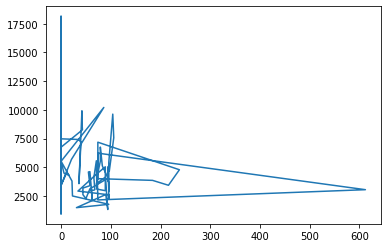

In [13]:
plt.plot(positive_series_new, pedestrian_series)

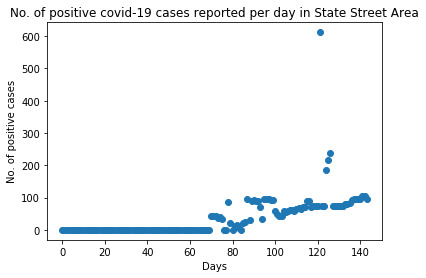

In [14]:
x = len(date_series)
plt.scatter(range(x),positive_series_new, marker='o')
plt.title("No. of positive covid-19 cases reported per day in State Street Area")
plt.xlabel("Days")
plt.ylabel("No. of positive cases")
plt.show()

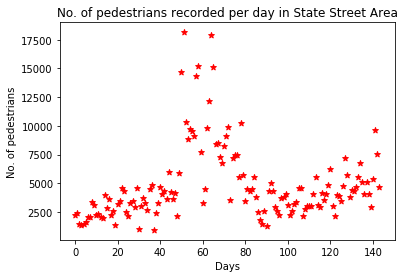

In [15]:
x = len(date_series)
plt.scatter(range(x),pedestrian_series, marker='*', color="red")
plt.title("No. of pedestrians recorded per day in State Street Area")
plt.xlabel("Days")
plt.ylabel("No. of pedestrians")
plt.show()

In [16]:
date_series[0]

'10-Apr'

In [17]:
date_series[120]

'8-Aug'

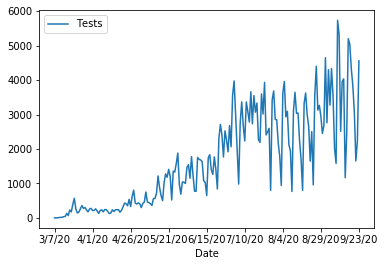

In [33]:
#import csv file with info about covid testing rates in Dane County
#TAKEN FROM: https://www.publichealthmdc.com/coronavirus/data
test_info = pd.read_csv("tests_dashboard_data copy.csv")
test_info
#remove unwanted columns
test_data = test_info[["Date", "Tests"]]
test_data = test_data.set_index("Date")
plot_test = test_data.plot()